In [24]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
from cycler import cycler
from pywaffle import Waffle
import numpy as np
%matplotlib inline 

In [25]:
# I like to see lots of stuff
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 120)

In [26]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':True, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['#e81c61', '#ffb845', '#fc6b4a', '#f9f871', '#31517a', '#3f0092']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

In [27]:
df_bash = pd.read_csv('wildlife/STRIKE_REPORTS_BASH (1990-Current).csv')

/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
df_bash.shape

(8607, 94)

In [29]:
df_bash.OPERATOR.value_counts()

MILITARY    8607
Name: OPERATOR, dtype: int64

In [30]:
df_90s = pd.read_csv('wildlife/STRIKE_REPORTS (1990-1999).csv')

/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,7,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df_90s.shape

(30087, 94)

In [32]:
df_90s[df_90s.OPERATOR == 'MILITARY']

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,REG,FLT,REMAINS_COLLECTED,REMAINS_SENT,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,FAAREGION,ENROUTE,RUNWAY,LOCATION,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLT,DAMAGE,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,STR_ENG2,DAM_ENG2,STR_ENG3,DAM_ENG3,STR_ENG4,DAM_ENG4,INGESTED,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,SKY,PRECIP,SPECIES_ID,SPECIES,BIRDS_SEEN,BIRDS_STRUCK,SIZE,WARNED,COMMENTS,REMARKS,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE


In [33]:
filenames = glob.glob("wildlife/*.csv")
filenames

['wildlife/STRIKE_REPORTS (2010-Current).csv',
 'wildlife/STRIKE_REPORTS_BASH (1990-Current).csv',
 'wildlife/STRIKE_REPORTS (2000-2009).csv',
 'wildlife/STRIKE_REPORTS (1990-1999).csv']

In [34]:
dataframes = []

for filename in filenames:
    df= pd.read_csv(filename)
    df['filename'] = filename
    dataframes.append(df)
    
everything = pd.concat(dataframes, ignore_index=True)
everything.head()

/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,7,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,7,17) have mixed types. Specify dtype 

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,REG,FLT,REMAINS_COLLECTED,REMAINS_SENT,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,FAAREGION,ENROUTE,RUNWAY,LOCATION,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLT,DAMAGE,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,STR_ENG2,DAM_ENG2,STR_ENG3,DAM_ENG3,STR_ENG4,DAM_ENG4,INGESTED,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,SKY,PRECIP,SPECIES_ID,SPECIES,BIRDS_SEEN,BIRDS_STRUCK,SIZE,WARNED,COMMENTS,REMARKS,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE,filename
0,133,BUS,BUSINESS,C-172,226,7,NaN,NaN,A,1.0,1.0,A,7,NaN,NaN,NaN,N2974D,NaN,0,0,"6/4/15, 12:00:00 AM",6.0,2015.0,NaN,NaN,KLVK,LIVERMORE MUNICIPAL ARPT,CA,AWP,NaN,25R,NaN,0.0,NaN,0.0,Take-off run,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,PART NOT REPORTED,NONE,NaN,NaN,NaN,UNKB,Unknown bird,NaN,2-10,NaN,NaN,NaN,"N2974D departed RWY 25R straight out. Controller observed birds falling out of the air onto the runway. Pilot asked if he hit any birds controller responded ""Affirmative"". Pilot said he wasn't sure whether he hit a bird or not but it was close. The pilot",NaN,NaN,NaN,NaN,NaN,Deleted,Deleted,NaN,MOR,Tower,NaN,NaN,NaN,0,0,wildlife/STRIKE_REPORTS (2010-Current).csv
1,134,JIA,PSA AIRLINES,CRJ100/200,188,10,22.0,04,A,3.0,2.0,D,5,5.0,NaN,NaN,NaN,5242,0,0,"6/4/15, 12:00:00 AM",6.0,2015.0,NaN,NaN,KPHL,PHILADELPHIA INTL,PA,AEA,NaN,35,NaN,0.0,NaN,0.0,Landing Roll,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,PART NOT REPORTED,NONE,NaN,NaN,NaN,UNKB,Unknown bird,NaN,1,NaN,NaN,NaN,JIA5242 REPORTED A BIRDSTRIKE DURING ROLLOUT ON RUNWAY 35. AIRCRAFT TAXIIED TO THE GATE WITHOUT INCIDENT.,NaN,NaN,NaN,NaN,NaN,Deleted,Deleted,NaN,MOR,Tower,NaN,NaN,NaN,0,0,wildlife/STRIKE_REPORTS (2010-Current).csv
2,136,SWA,SOUTHWEST AIRLINES,B-737,148,95,NaN,NaN,A,4.0,2.0,D,1,1.0,NaN,NaN,NaN,2240,0,0,"6/5/15, 12:00:00 AM",6.0,2015.0,NaN,NaN,KDCA,RONALD REAGAN WASHINGTON NATIONAL ARPT,DC,AEA,NaN,1,NaN,0.0,NaN,0.0,Landing Roll,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,PART NOT REPORTED,NONE,NaN,NaN,NaN,UNKB,Unknown bird,NaN,1,NaN,NaN,NaN,BIRD STRIKE: SWA2240 ENCOUNTERED A BIRD STRIKE OVER THE RUNWAY WHILE LANDING RWY01. NO ASSISTANCE WAS REQUIRED. THE PILOT CONTACTED THE TOWER AND STATED THAT THERE WAS NO OBSERVED DAMAGE TO THE AIRCRAFT. PILOT NAME: RODNEY STOUT PILOT CONTACT NUMBER: (830,NaN,NaN,NaN,NaN,NaN,Deleted,Deleted,NaN,MOR,Tower,NaN,NaN,NaN,0,0,wildlife/STRIKE_REPORTS (2010-Current).csv
3,137,RPA,REPUBLIC AIRLINES,EMB-170,332,NaN,22.0,04,A,4.0,2.0,D,1,1.0,NaN,NaN,NaN,4463,0,0,"6/5/15, 12:00:00 AM",6.0,2015.0,NaN,NaN,KDCA,RONALD REAGAN WASHINGTON NATIONAL ARPT,DC,AEA,NaN,1,NaN,0.0,NaN,0.0,Landing Roll,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,PART NOT REPORTED,NONE,NaN,NaN,NaN,UNKB,Unknown bird,NaN,1,NaN,NaN,NaN,BIRD STRIKE: RPA4463 ENCOUNTERED A BIRD STRIKE OVER THE RUNWAY WHILE LANDING RWY01. NO ASSISTANCE WAS REQUIRED. THE PILOT CONTACTED THE TOWER AND STATED THAT THERE WAS NO OBSERVED DAMAGE TO THE AIRCRAFT. PILOT NAME: WADE MCDOWELL PILOT CONTACT NUMBER: (50,NaN,NaN,NaN,NaN,NaN,Deleted,Deleted,NaN,MOR,Tower,NaN,NaN,NaN,0,0,wildlife/STRIKE_REPORTS (2010-Current).csv
4,138,AAL,AMERICAN AIRLINES,EMB-190,332,NaN,22.0,04,A,4.0,2.0,D,1,1.0,NaN,NaN,NaN,2144,0,0,"6/5/15, 12:00:00 AM",6.0,2015.0,NaN,NaN,KDCA,RONALD REAGAN WASHINGTON NATIONAL ARPT,DC,AEA,NaN,1,NaN,0.0,NaN,0.0,Landing Roll,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,PART NOT REPORTED,NONE,NaN,NaN,NaN,UNKB,Unknown bird,NaN,1,NaN,NaN,NaN,BIRD STRIKE: AWE2144 ENCOUNTERED A BIRD STRIKE OVER THE RUNWAY WHILE LANDING R

In [35]:
everything.shape

(207430, 95)

In [36]:
# double checking to make sure I understood the csvs correctly (BASH = all the military strikes) 
# and there aren't military doubles
everything[everything.OPERATOR=='MILITARY'].OPERATOR.value_counts()

MILITARY    8610
Name: OPERATOR, dtype: int64

In [37]:
#checking out all of the column names and data types
#to reference with the FAA documentation
everything.dtypes

INDEX_NR                 int64  
OPID                     object 
OPERATOR                 object 
ATYPE                    object 
AMA                      object 
AMO                      object 
EMA                      float64
EMO                      object 
AC_CLASS                 object 
AC_MASS                  float64
NUM_ENGS                 float64
TYPE_ENG                 object 
ENG_1_POS                object 
ENG_2_POS                float64
ENG_3_POS                object 
ENG_4_POS                float64
REG                      object 
FLT                      object 
REMAINS_COLLECTED        int64  
REMAINS_SENT             int64  
INCIDENT_DATE            object 
INCIDENT_MONTH           float64
INCIDENT_YEAR            float64
TIME_OF_DAY              object 
TIME                     float64
AIRPORT_ID               object 
AIRPORT                  object 
STATE                    object 
FAAREGION                object 
ENROUTE                  object 
RUNWAY    

In [38]:
# what birds/animals are involved in the most strikes?
everything.SPECIES.value_counts()

Unknown bird - medium          39813
Unknown bird - small           37938
Unknown bird                   9769 
Mourning dove                  9525 
Gulls                          6990 
Killdeer                       5969 
American kestrel               5716 
Barn swallow                   5503 
Horned lark                    5198 
European starling              4578 
Sparrows                       3469 
Rock pigeon                    3276 
Unknown bird - large           3117 
Red-tailed hawk                2834 
Eastern meadowlark             2504 
Cliff swallow                  1910 
Ring-billed gull               1762 
Canada goose                   1743 
Western meadowlark             1499 
Hawks                          1429 
American robin                 1399 
Herring gull                   1385 
Barn owl                       1378 
Blackbirds                     1301 
Swallows                       1208 
Perching birds (y)             1177 
Doves                          1105 
P

In [39]:
fatal_df = everything[everything.NR_FATALITIES > 0]
fatal_df

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,REG,FLT,REMAINS_COLLECTED,REMAINS_SENT,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,FAAREGION,ENROUTE,RUNWAY,LOCATION,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLT,DAMAGE,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,STR_ENG2,DAM_ENG2,STR_ENG3,DAM_ENG3,STR_ENG4,DAM_ENG4,INGESTED,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,SKY,PRECIP,SPECIES_ID,SPECIES,BIRDS_SEEN,BIRDS_STRUCK,SIZE,WARNED,COMMENTS,REMARKS,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE,filename
33348,332826,BUS,BUSINESS,EXPERIMENTAL,998,3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,N1959N,NaN,1,1,"2/13/13, 12:00:00 AM",2.0,2013.0,Day,1615.0,ZZZZ,UNKNOWN,NaN,NaN,CA,NaN,"NEAR WINTERS, CA",NaN,NaN,NaN,En Route,D,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,NaN,Other,CRASHED,NaN,NaN,K1002,Turkey vulture,NaN,1,Large,NaN,NTSB WPRxxFAxxx OPER = SHARMAN ENTERPRISES INC A/C = AVIONS FAIREY TIPSY NIPPER T-xx. FAA SHOWS A/C AS EXPERIMENTAL/EXHIBITION.,"ID BY SMITHSONIAN, FAA 9962. INFORMATION DERIVED FROM PRELIMINARY NTSB REPORT - A/C WAS SUBSTANTIALLY DAMAGED FOLLOWING IMPACT WITH TERRAIN NEAR WINTERS, CA. THE COMMERCIAL PILOT WAS FATALLY INJURED. THE CROSS-COUNTRY FLIGHT ORIGINATED FROM YOLO COUNTY ARPT, DAVIS/WINTERS, CA, APPROX 15 MINUTES BEFORE THE ACCIDENT. A FLIGHT PLAN HAD NOT BEEN FILED BUT FRIENDS OF THE PILOT SAID HIS DESTINATION WAS NUT TREE ARPT IN VACAVILLE, CA. SEVERAL WITNESSES HEARD A LOUD BANG/POP AND OBSERVED THE PLANE FLUTTERING DOWN IN PIECES. THERE WAS NO POST IMPACT FIRE. HIGHWAY PATROL PICKED UP THE BIRD CARCASS BUT INITIALLY IT HAD NOT BEEN CONNECTED WITH THE ACCIDENT. LATER, DNA FROM AIRCRAFT AND CARCASS PROVIDED POSITIVE PROOF.",NaN,NaN,NaN,NaN,NaN,Deleted,Deleted,NaN,NTSB,Other,NaN,1.0,"6/27/13, 12:00:00 AM",0,1,wildlife/STRIKE_REPORTS (2010-Current).csv
73091,374990,PVT,PRIVATELY OWNED,C-172,226,7,NaN,NaN,A,1.0,1.0,A,7,NaN,NaN,NaN,N63541,NaN,1,1,"4/20/16, 12:00:00 AM",4.0,2016.0,Day,900.0,ZZZZ,UNKNOWN,NaN,NaN,AK,NaN,"2 miles SW Birchwood Airport, Chugiak, AK",900.0,100.0,0.0,En Route,D,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,NaN,Other,Fatal accident (4),No Cloud,None,K3201,Bald eagle,NaN,1,Large,N,"xxxx-x-x-xxxxxx, NTSB ACCIDENT NUMBER ANCxxFAxxx, MAIL IN xxxx-x WITH SI ID","Possible bird snarge recovered from tail structure following the accident. The included feather was located in a small sampling near the initial impact point through the trees and first pieces of debris.ID by Smithsonian, Division of Birds. NOTE: NTSB investigation is ongoing as to the final cause of the accident. NTSB ID: ANC16FA019. Height reported as 800-1000 AGL, took average of 900. Speed reported as 100kts est. Species Ided by Smithsonian from feather barbules removed from tail section and a whole feather on the ground. Immature Bald Eagle.",NaN,NaN,NaN,NaN,NaN,Deleted,Deleted,"6/7/16, 12:00:00 AM",Multiple,Other,NaN,4.0,"12/20/17, 12:00:00 AM",0,1,wildlife/STRIKE_REPORTS (2010-Current).csv
79962,383773,BUS,BUSINESS,BELL-407,128,11,1.0,NaN,B,2.0,1.0,F,6,NaN,NaN,NaN,N620PA,NaN,1,1,"11/19/17, 12:00:00 AM",11.0,2017.0,Night,2000.0,ZZZZ,UNKNOWN,NaN,NaN,AR,NaN,"Stuttgart, AR",1253.0,NaN,NaN,En Route,S,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Some Cloud,None,J2202,Snow goose,Over 100,2-10,Large,Y,",xxxx-xx-xx-xxxxxx, AIR METHODS,",two or more bird impacts to helicopter. 3 fatal accident. Snow Goose - 11 bags of remains received from FAA. All equal Snow Goose\r\nNOTE: FAA/NTSB INVESTIGATION PENDING as of time of this report. NTSB accident number CEN18FA033,NaN,2540000.0,NaN,2346877.0

In [40]:
injuries_df = everything[everything.NR_INJURIES > 0]
injuries_df

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,REG,FLT,REMAINS_COLLECTED,REMAINS_SENT,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,FAAREGION,ENROUTE,RUNWAY,LOCATION,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLT,DAMAGE,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,STR_ENG2,DAM_ENG2,STR_ENG3,DAM_ENG3,STR_ENG4,DAM_ENG4,INGESTED,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,SKY,PRECIP,SPECIES_ID,SPECIES,BIRDS_SEEN,BIRDS_STRUCK,SIZE,WARNED,COMMENTS,REMARKS,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE,filename
1574,300911,GOV,GOVERNMENT,BE-95,123,19,13.0,13,A,1.0,2.0,A,4,4.0,NaN,NaN,N70283,NaN,0,0,"4/6/10, 12:00:00 AM",4.0,2010.0,Night,2151.0,ZZZZ,UNKNOWN,NaN,NaN,ND,NaN,CENTER,2700.0,130.0,NaN,En Route,S,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,NaN,Precautionary Landing,EMERGENCY DECLARED,No Cloud,None,J2109,Mallard,NaN,2-10,Medium,N,"OPER = STATE OF NORTH DAKOTA, ATTORNEY GENERAL SOURCE = THREE xxxx-x (xxxx-x-x-xxxxxx, xxxxxx, NTSB CENxxTAxxx, NEWS MEDIA, AON DAILY INCIDENTS, & FAA ACCIDENT/INCIDENT PRELIM DATA","A/C RETD TO BIS IN EMERGENCY CONDITIONS AFTER STRIKING ""GEESE"". AT LEAST 1 ENTERED THE CABIN THROUGH THE WINDSHLD AND STRUCK THE PILOT CAUSING SERIOUS INJURIES REQUIRING STITCHES. PILOTS WERE UNABLE TO HEAR THE TOWER BECAUSE OF THE WIND NOISE. BOTH PILOTS WERE STRUCK BY THE BIRD. CO/P SAFELY LANDED AT BIS. NTSB INVESTIGATED. THE A/C SUSTAINED SUBSTANTIAL STRUCTURAL DMG TO THE RT COCKPIT WINDSHIELD, RT WING LEADING EDGE AND NOSE CONE. THEY REPLACED THE HEADLINER AND RECOVERED THE SEATS. BIRD ALSO REPORTED AS SNOW GEESE. WILDLIFE OFFICER (ONE OF THE PILOTS) ID'D BIRDS AS MALLARDS",NaN,14000.0,NaN,15557.0,NaN,Deleted,Deleted,NaN,Multiple,Airport Operations,1.0,NaN,"8/4/10, 12:00:00 AM",0,1,wildlife/STRIKE_REPORTS (2010-Current).csv
1593,300930,BUS,BUSINESS,AGUSTA 109,036,4,31.0,13,B,2.0,2.0,F,NaN,NaN,NaN,NaN,N910LB,NaN,1,1,"5/10/10, 12:00:00 AM",5.0,2010.0,Day,1600.0,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,LA,ASW,NaN,NaN,NaN,900.0,120.0,5.0,Approach,S,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,NaN,Precautionary Landing,NaN,No Cloud,None,K1001,Black vulture,1,1,Large,Y,"OPER = ERA HELICOPTERS LLC. SOURCE = xxxx-x (xxxx-x-xx-xxxxx, Rx & Rx), FAA ACCIDENT/INCIDENT PRELIM DATA & AON DAILY INCIDENTS (x/xx/xx UPDATED PHASE)","ID BY SMITHSONIAN, FAA 4316. DNA & WHOLE FEATHER. PAX RECEIVED CUT ON HIS CHIN AND A SWOLLEN CHEEK. PILOT AND PAX WERE WEARING HELMETS. WINDSHLD WAS BROKEN, FRAME WAS DEFORMED, SKYLIGHT WAS BROKEN AND VERTICAL FIN WAS DAMAGED.",5.0,80000.0,25000.0,88896.0,27780.0,Deleted,Deleted,NaN,Multiple,Air Transport Operations,1.0,NaN,"5/30/13, 12:00:00 AM",0,1,wildlife/STRIKE_REPORTS (2010-Current).csv
1787,301142,PVT,PRIVATELY OWNED,ROBINSON R22,762,1,7.0,10,B,1.0,1.0,A,6,NaN,NaN,NaN,N116RS,NaN,0,0,"2/7/10, 12:00:00 AM",2.0,2010.0,Day,1450.0,ZZZZ,UNKNOWN,NaN,NaN,FL,NaN,MIAMI,800.0,80.0,NaN,En Route,S,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,NaN,Other,UNABLE TO HEAR ATC,No Cloud,None,K1002,Turkey vulture,1,1,Large,Y,"OPER = P APPLETON SOURCE = TWO xxxx-x (xxxx-x-xx-xxxxx), AON DAILY INCIDENTS, FAA ACCIDENT/INCIDENT PRELIM NOTICE & NEWS MEDIA","MAJOR HOLE TO WINDSHLD. DOOR FRAME BENT. MINOR SCRAPE TO MY FOREHEAD AND PAX HAND. VULTURE ENTERED THE COCKPIT AND CAME TO REST ON MY LAP AND FOREARM. IT'S HEAD WAS RESTING ON THE CYCLIC. LUCKILY, IT DID NOT EFFECT MY ABILITY TO MAINTAIN FLT CONTROL. BIRD FLEW AWAY UPON LDG. HOLE IN WINDSHLD MADE IT DIFFICULT TO HEAR ATC. VIDEO OF BIRD FLYING AWAY.",336.0,2200.0,1000.0,2445.0,1111.0,Deleted,Deleted,NaN,Multiple,Pilot,2.0,NaN,"6/3/10, 12

In [41]:
fatal_df.shape

(14, 95)

In [42]:
injuries_df.shape

(242, 95)

In [43]:
everything['INCIDENT_YEAR'] = everything.INCIDENT_YEAR.fillna(0).astype(int)

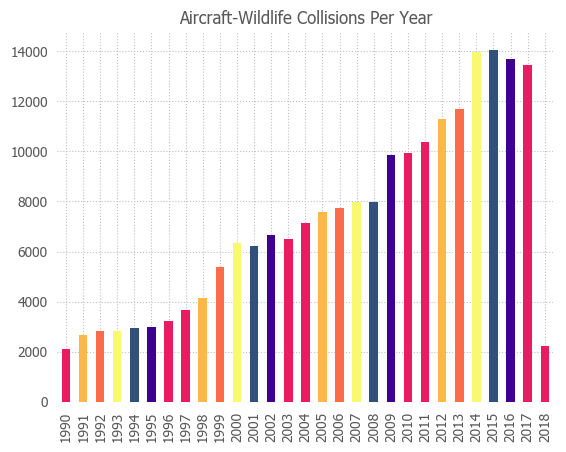

In [45]:
everything.INCIDENT_YEAR.value_counts().sort_index().tail(-1).plot(kind='bar', title="Aircraft-Wildlife Collisions Per Year")
plt.show()

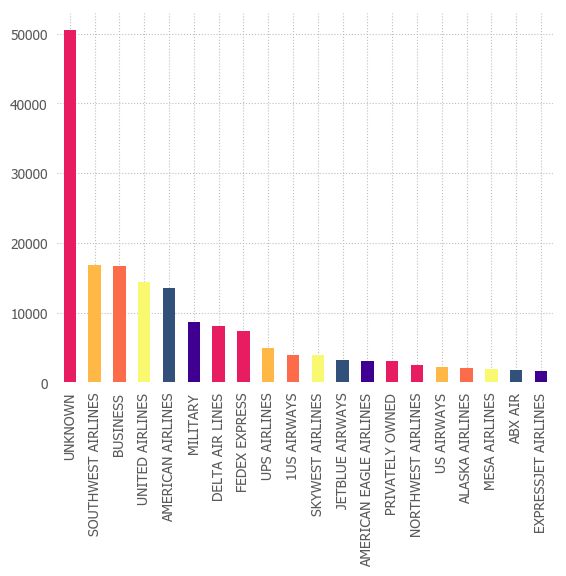

In [46]:
everything.OPERATOR.value_counts().head(20).plot(kind='bar', x='OPERATOR')
plt.show()

In [23]:
everything.tail()

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,REG,FLT,REMAINS_COLLECTED,REMAINS_SENT,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,FAAREGION,ENROUTE,RUNWAY,LOCATION,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLT,DAMAGE,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,STR_ENG2,DAM_ENG2,STR_ENG3,DAM_ENG3,STR_ENG4,DAM_ENG4,INGESTED,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,SKY,PRECIP,SPECIES_ID,SPECIES,BIRDS_SEEN,BIRDS_STRUCK,SIZE,WARNED,COMMENTS,REMARKS,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE,filename
207425,130180,FLG*,PINNACLE,SAAB-340,778,5,22.0,22,A,3.0,2.0,C,4,4.0,NaN,NaN,N368MA?,NaN,0,0,"11/14/92, 12:00:00 AM",11.0,1992,NaN,NaN,KGPT,GULFPORT-BILOXI INTL APRT,MS,ASO,NaN,NaN,NaN,0.0,NaN,0.0,Landing Roll,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1F11,Coyote,NaN,1,Large,NaN,Source = ASIAS report,On landing r/o the a/c rt main landuing gear struck a coyote.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,NaN,NaN,"12/20/17, 12:00:00 AM",0,0,wildlife/STRIKE_REPORTS (1990-1999).csv
207426,130181,BUS,BUSINESS,BE-95,123,19,13.0,13,A,1.0,2.0,A,4,4.0,NaN,NaN,N96NL,NaN,0,0,"5/14/90, 12:00:00 AM",5.0,1990,NaN,NaN,KMAF,MIDLAND INTL,TX,ASW,NaN,NaN,NaN,0.0,NaN,0.0,Take-off run,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,NaN,Other,Loss of steering,NaN,NaN,1D11,Black-tailed jackrabbit,NaN,1,Large,NaN,Source = ASIAS report. Operator /owner = Air Exchange Inc,Struck jackrabbit on t/o. Continued to destination. Had no nose wheel steering and departed end of runway.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,NaN,NaN,"12/20/17, 12:00:00 AM",0,1,wildlife/STRIKE_REPORTS (1990-1999).csv
207427,130182,PVT,PRIVATELY OWNED,C-150,226,5,NaN,NaN,A,1.0,1.0,A,7,NaN,NaN,NaN,N8146V,NaN,0,0,"6/17/90, 12:00:00 AM",6.0,1990,Dusk,NaN,TX33,HAIRE ARPT,TX,ASW,NaN,NaN,NaN,NaN,NaN,0.0,Approach,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1UNKM,Unknown terrestrial mammal,1,1,NaN,NaN,Source = ASIAS Operator / owner = Anthony Michael,On flare out hit an animal. Damaged left main gear. Damage level reported as minor.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,NaN,NaN,"12/20/17, 12:00:00 AM",0,1,wildlife/STRIKE_REPORTS (1990-1999).csv
207428,130183,UNK,UNKNOWN,C-150,226,5,NaN,NaN,A,1.0,1.0,A,7,NaN,NaN,NaN,N8932S,NaN,0,0,"3/22/90, 12:00:00 AM",3.0,1990,NaN,NaN,F10,HENRYETTA MUNICIPAL ARPT,OK,ASW,NaN,NaN,NaN,0.0,NaN,0.0,Take-off run,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,NaN,Other,Negative effect on flight,NaN,NaN,1F12,Domestic dog,1,NaN,Large,NaN,Source = ASIAS Operator / owner = unknown,This was not a strike but had a negative effect on flight. Swerved to miss dog on takeoff. Became airborne and returned to ground. Damaged nose gear and wing tip.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,NaN,NaN,"12/20/17, 12:00:00 AM",0,1,wildlife/STRIKE_REPORTS (1990-1999).csv
207429,130184,PVT,PRIVATELY OWNED,TAYLORCR-BC,918,1,13.0,25,A,1.0,1.0,A,7,NaN,NaN,NaN,n43814,NaN,0,0,"5/2/91, 12:00:00 AM",5.0,1991,NaN,NaN,9D2,HARDING COUNTY ARPT,SD,AGL,NaN,NaN,NaN,NaN,NaN,0.0,Approach,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,NaN,Precautionary Landing,NaN,NaN,NaN,1G52,Domestic sheep,2-10,1,Large,NaN,Source = ASIAS Operator / owner = Caleb Turk,"Sheep on landing strip. (# seen not reported, assume 2-10) Made low pass to herd sheep off strip. Gear hit one. Flew to Spearfish Airport. Safe landing. Damage reported as minor.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,NaN,NaN,"12/20/17, 12:00:00 AM",0,1,wildlife/STRIKE_REPORTS (1990-1999).csv


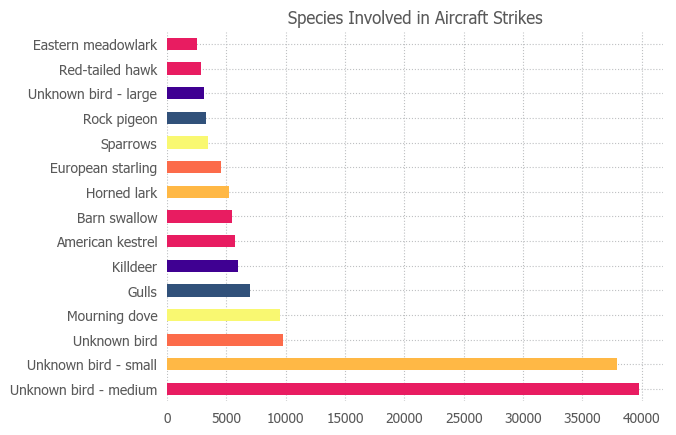

In [54]:
everything.SPECIES.value_counts().head(15).plot(kind='barh', title='Species Involved in Aircraft Strikes')
plt.show()

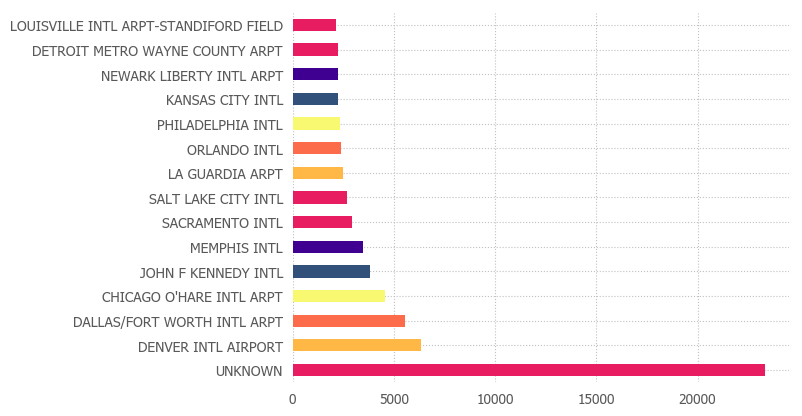

In [61]:
# Which airports are involved in the most strikes?
everything.AIRPORT.value_counts().head(15).plot(kind='barh')
plt.show()

In [82]:
repairs_df = everything[everything.COST_REPAIRS > 0]
repairs_df.shape

(4938, 95)

In [80]:
#What species are the most expensive to hit?
repairs_df.SPECIES.value_counts()

Unknown bird - medium                     1015
Unknown bird - small                      499 
White-tailed deer                         323 
Canada goose                              316 
Unknown bird - large                      312 
Gulls                                     301 
Turkey vulture                            172 
Red-tailed hawk                           147 
Unknown bird                              129 
Mourning dove                             104 
Mallard                                   81  
Ducks                                     80  
Hawks                                     76  
New World Vultures                        74  
Rock pigeon                               69  
Geese                                     60  
Black vulture                             52  
Bald eagle                                51  
European starling                         50  
Ring-billed gull                          49  
American robin                            49  
Snow goose   

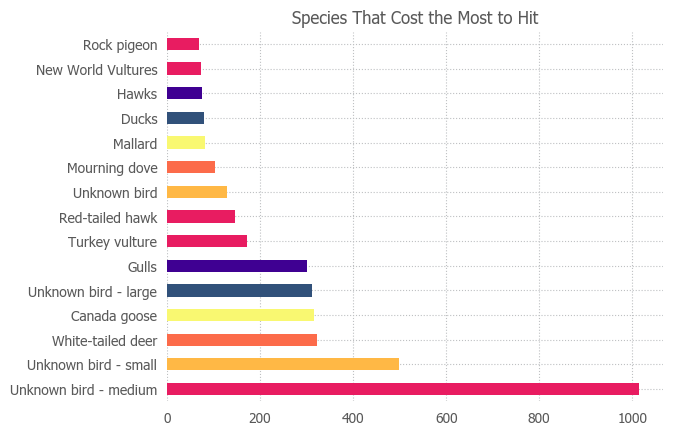

In [81]:
repairs_df.SPECIES.value_counts().head(15).plot(kind='barh', title='Species That Cost the Most to Hit')
plt.show()

In [83]:
everything.COST_REPAIRS.sum()

587523131.0

In [84]:
repairs_df.COST_REPAIRS.sum()

587523131.0